CLIMATE CHANGE ANALYSIS AS PER THE GLOBAL TEMP , METHANE, CO2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [6]:
# Load CO2 data
co2_df = pd.read_csv('co2.txt', comment='#', delim_whitespace=True,
                     names=["year", "month", "decimal_date", "co2_avg", "co2_deseasonalized", "days", "std_dev", "uncertainty"],
                     engine='python')

# Load Methane data
methane_df = pd.read_csv('methane.txt', comment='#', delim_whitespace=True,
                         names=["year", "month", "decimal_date", "ch4_avg", "ch4_unc", "ch4_trend", "ch4_trend_unc"],
                         engine='python')

# Load Temperature data
temp_df = pd.read_csv('temparature.txt', comment='-', delim_whitespace=True,
                      names=["year", "temp_raw", "temp_smoothed"],
                      skiprows=4,
                      engine='python')


C:\Users\admin\AppData\Local\Temp\ipykernel_10288\323373713.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  co2_df = pd.read_csv('co2.txt', comment='#', delim_whitespace=True,
C:\Users\admin\AppData\Local\Temp\ipykernel_10288\323373713.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  methane_df = pd.read_csv('methane.txt', comment='#', delim_whitespace=True,
C:\Users\admin\AppData\Local\Temp\ipykernel_10288\323373713.py:12: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  temp_df = pd.read_csv('temparature.txt', comment='-', delim_whitespace=True,


CLEAN THE DATA 

In [7]:
# Keep necessary columns only
co2_df = co2_df[["decimal_date", "co2_avg"]].dropna()
methane_df = methane_df[["decimal_date", "ch4_avg"]].dropna()
temp_df = temp_df[["year", "temp_raw"]].dropna()

# Extract year for grouping
co2_df['year'] = co2_df['decimal_date'].astype(int)
methane_df['year'] = methane_df['decimal_date'].astype(int)

# Aggregate monthly data to yearly
co2_yearly = co2_df.groupby('year').mean(numeric_only=True).reset_index()
methane_yearly = methane_df.groupby('year').mean(numeric_only=True).reset_index()


MERGED THE DATA 

In [8]:
# Merge all data on year
combined_df = co2_yearly.merge(methane_yearly, on='year', how='inner')
combined_df = combined_df.merge(temp_df, on='year', how='inner')

# Preview final dataset
combined_df.head()


,year,decimal_date_x,co2_avg,decimal_date_y,ch4_avg,temp_raw
0,1983,1983.5,343.152500,1983.75,1636.573333,0.31
1,1984,1984.5,344.868333,1984.50,1645.013333,0.16
2,1985,1985.5,346.351667,1985.50,1657.369167,0.12
3,1986,1986.5,347.607500,1986.50,1670.210833,0.18
4,1987,1987.5,349.311667,1987.50,1682.806667,0.32


VISUALIZATION

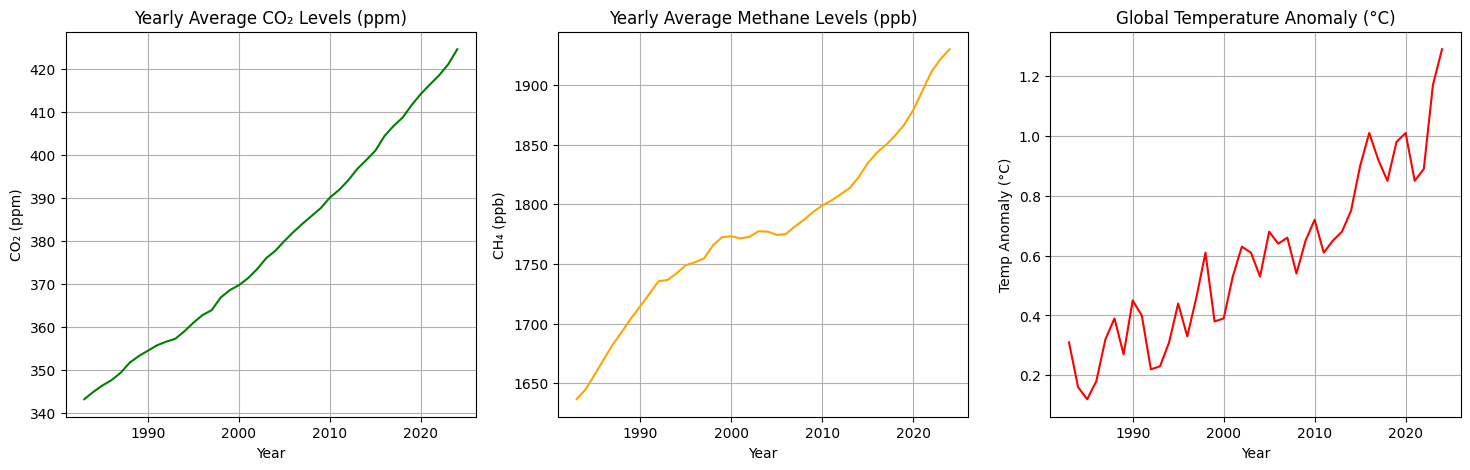

In [23]:
plt.figure(figsize=(18, 5))

# CO₂ Trend
plt.subplot(1, 3, 1)
sns.lineplot(data=combined_df, x='year', y='co2_avg', color='green')
plt.title("Yearly Average CO₂ Levels (ppm)")
plt.xlabel("Year"); plt.ylabel("CO₂ (ppm)"); plt.grid(True)

# CH₄ Trend
plt.subplot(1, 3, 2)
sns.lineplot(data=combined_df, x='year', y='ch4_avg', color='orange')
plt.title("Yearly Average Methane Levels (ppb)")
plt.xlabel("Year"); plt.ylabel("CH₄ (ppb)"); plt.grid(True)

# Temperature Trend
plt.subplot(1, 3, 3)
sns.lineplot(data=combined_df, x='year', y='temp_raw', color="red")
plt.title("Global Temperature Anomaly (°C)")
plt.xlabel("Year"); plt.ylabel("Temp Anomaly (°C)"); plt.grid(True)


plt.show()


CORRELATION ANALYSIS

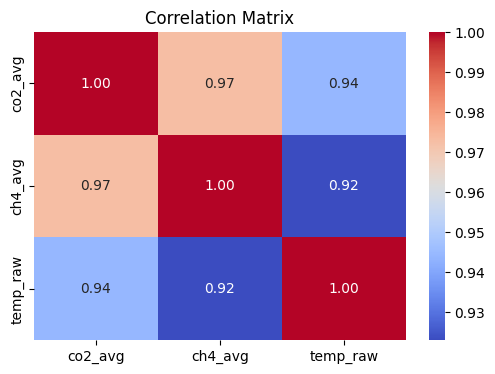

In [37]:
plt.figure(figsize=(6, 4))
corr = combined_df[['co2_avg', 'ch4_avg', 'temp_raw']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


LINEAR REGRESSION PREDICTION

In [39]:
# Features and target
X = combined_df[["co2_avg", "ch4_avg"]]
y = combined_df["temp_raw"]

# Train model
model = LinearRegression()
model.fit(X, y)

# Predict
y_pred = model.predict(X)

# Evaluation
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"MSE: {mse:.4f}")
print(f"R² Score: {r2:.4f}")


MSE: 0.0085
R² Score: 0.8920


PLOT ACTUAL VS PREDICTION 

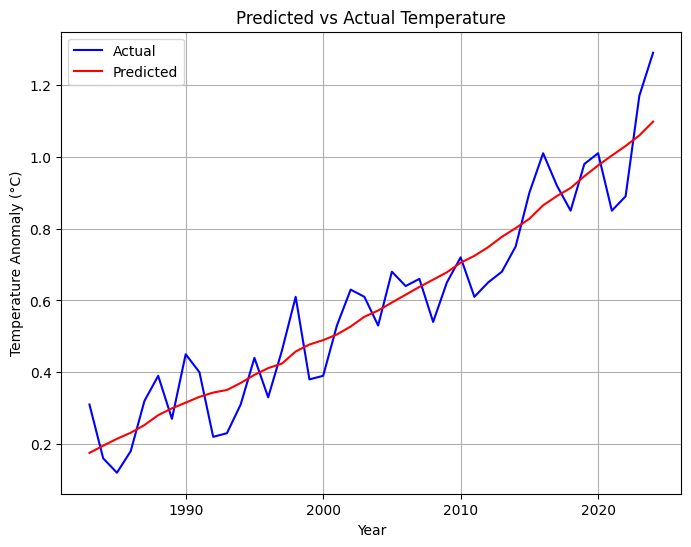

In [41]:
plt.figure(figsize=(8, 6))
sns.lineplot(x=combined_df["year"], y=y, label="Actual", color='blue')
sns.lineplot(x=combined_df["year"], y=y_pred, label="Predicted", color='red')
plt.title("Predicted vs Actual Temperature")
plt.xlabel("Year"); plt.ylabel("Temperature Anomaly (°C)")
plt.legend(); plt.grid(True)
plt.show()


In [ ]:
combined_df.to_csv("climate_change_summary.csv", index=False)


future prediction

In [44]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare data
years = combined_df[["year"]]
co2_trend_model = LinearRegression()
ch4_trend_model = LinearRegression()

# Fit models
co2_trend_model.fit(years, combined_df[["co2_avg"]])
ch4_trend_model.fit(years, combined_df[["ch4_avg"]])


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [46]:
# Define future years
future_years = pd.DataFrame({"year": np.arange(2025, 2051)})

# Predict future gas levels using the trend models
# Predict future CO2 and CH4 using only the 'year' values (without column names)
future_years["co2_avg"] = co2_trend_model.predict(future_years[["year"]].values)
future_years["ch4_avg"] = ch4_trend_model.predict(future_years[["year"]].values)


c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [48]:
future_years["predicted_temp"] = model.predict(future_years[["co2_avg", "ch4_avg"]])
print(future_years)


    year     co2_avg      ch4_avg  predicted_temp
0   2025  421.318668  1904.003761        1.056387
1   2026  423.275120  1909.778542        1.078145
2   2027  425.231571  1915.553323        1.099904
3   2028  427.188023  1921.328104        1.121663
4   2029  429.144474  1927.102885        1.143422
5   2030  431.100926  1932.877666        1.165181
6   2031  433.057377  1938.652446        1.186940
7   2032  435.013829  1944.427227        1.208698
8   2033  436.970280  1950.202008        1.230457
9   2034  438.926732  1955.976789        1.252216
10  2035  440.883184  1961.751570        1.273975
11  2036  442.839635  1967.526351        1.295734
12  2037  444.796087  1973.301132        1.317493
13  2038  446.752538  1979.075913        1.339251
14  2039  448.708990  1984.850693        1.361010
15  2040  450.665441  1990.625474        1.382769
16  2041  452.621893  1996.400255        1.404528
17  2042  454.578344  2002.175036        1.426287
18  2043  456.534796  2007.949817        1.448046


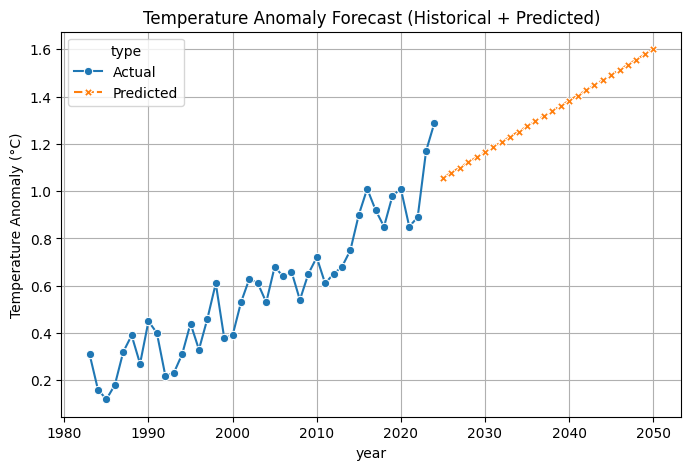

In [49]:
# Prepare plotting data
actual_temp = combined_df[["year", "temp_raw"]].rename(columns={"temp_raw": "temperature"})
actual_temp["type"] = "Actual"

future_temp = future_years.rename(columns={"predicted_temp": "temperature"})
future_temp["type"] = "Predicted"

plot_df = pd.concat([actual_temp, future_temp], ignore_index=True)

# Plot
plt.figure(figsize=(8, 5))
sns.lineplot(data=plot_df, x="year", y="temperature", hue="type", style="type", markers=True)
plt.title("Temperature Anomaly Forecast (Historical + Predicted)")
plt.ylabel("Temperature Anomaly (°C)")
plt.grid(True)
plt.show()


In [50]:
combined_df.to_csv("climate_change_summary.csv", index=False)